<a href="https://colab.research.google.com/github/aneesh98/Insincere-Question-Classification/blob/master/QIQC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!chmod +x ./kagglesetup.sh
!./kagglesetup.sh c quora-insincere-questions-classification

 89% 49.0M/54.9M [00:01<00:00, 28.0MB/s]
100% 54.9M/54.9M [00:01<00:00, 34.5MB/s]
 57% 9.00M/15.8M [00:00<00:00, 26.7MB/s]
100% 15.8M/15.8M [00:00<00:00, 35.5MB/s]
  0% 0.00/4.09M [00:00<?, ?B/s]
100% 4.09M/4.09M [00:00<00:00, 67.0MB/s]
100% 5.95G/5.96G [01:28<00:00, 46.3MB/s]
100% 5.96G/5.96G [01:28<00:00, 71.9MB/s]


In [ ]:
!unzip train.csv.zip
!unzip test.csv.zip

Archive:  train.csv.zip
  inflating: train.csv               
Archive:  test.csv.zip
  inflating: test.csv                


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
df_train = pd.read_csv('train.csv')


In [ ]:
from nltk.corpus import stopwords
import nltk
from collections import defaultdict
import pandas
nltk.download('stopwords')
stop=set(stopwords.words('english'))
word_count = defaultdict(int)
def remove_stopwords(text):
  tokens = text.split()
  filtered_tokens = [token for token in tokens
                     if token.lower() not in stop]
  filtered_text = ' '.join(filtered_tokens)
  return filtered_text

neg_texts_orig = df_train[df_train['target'] == 1].question_text.map(lambda x : remove_stopwords(x))
pos_texts_orig = df_train[df_train['target'] == 0].question_text.map(lambda x : remove_stopwords(x))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
neg_texts = neg_texts_orig.map(lambda x: x.split())
pos_texts = pos_texts_orig.map(lambda x: x.split())

In [ ]:
from nltk import ngrams
def get_ngrams_count(texts, n = 1):
  counter = defaultdict(int)
  for text in texts:
    text = ngrams(text, n)
    for word in text:
      counter[word] += 1
  return counter

neg_words_counter = get_ngrams_count(neg_texts, 1)
pos_words_counter = get_ngrams_count(pos_texts, 1)

In [ ]:
neg_words_counter = sorted(neg_words_counter.items(), key = lambda x: x[1], reverse = True)[:10]
pos_words_counter = sorted(pos_words_counter.items(), key = lambda x: x[1], reverse = True)[:10]

In [ ]:
neg_words_counter = [[' '.join(text), freq] for text, freq in neg_words_counter]

In [ ]:
pos_words_counter = [[' '.join(text), freq] for text, freq in pos_words_counter]

In [ ]:
p_words, p_counts = zip(*pos_words_counter)
n_words, n_counts = zip(*neg_words_counter)

In [ ]:
p_counts

(60794, 58579, 48251, 37448, 37210, 34639, 27978, 25609, 21599, 20525)

Text(0, 0.5, 'Frequencies')

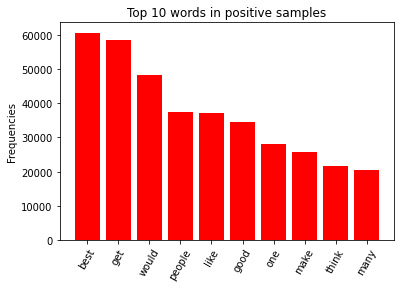

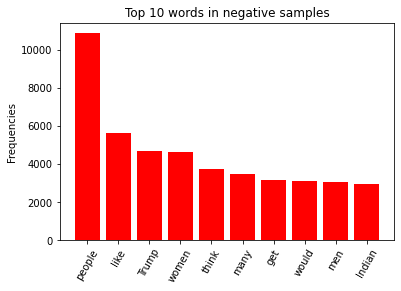

In [ ]:
import matplotlib.pyplot as plt
plt.bar(p_words, p_counts, color = 'red')
plt.xticks(rotation = 60)
plt.title("Top 10 words in positive samples")
plt.ylabel('Frequencies')
plt.figure()
plt.bar(n_words, n_counts, color = 'red')
plt.xticks(rotation = 60)
plt.title("Top 10 words in negative samples")
plt.ylabel('Frequencies')

In [ ]:
from tqdm import tqdm

In [ ]:
def create_corpus(texts):
  vocab = []
  for text in tqdm(texts):
    for i in text:
      vocab.append(i)
  return vocab
neg_corpus = create_corpus(neg_texts)
pos_corpus = create_corpus(pos_texts)

100%|██████████| 1225312/1225312 [00:01<00:00, 1082052.13it/s]


In [ ]:
from wordcloud import WordCloud
neg_dict = get_ngrams_count(neg_texts,1)
pos_dict = get_ngrams_count(pos_texts,1)
neg_counts = {''.join(k):v for k, v in zip(neg_dict.keys(), neg_dict.values())}
pos_counts = {''.join(k):v for k, v in zip(pos_dict.keys(), pos_dict.values())}
neg_wcloud = WordCloud().generate_from_frequencies(neg_counts)
neg_pcloud = WordCloud().generate_from_frequencies(pos_counts)

Text(0.5, 1.0, 'Positive Word Cloud')

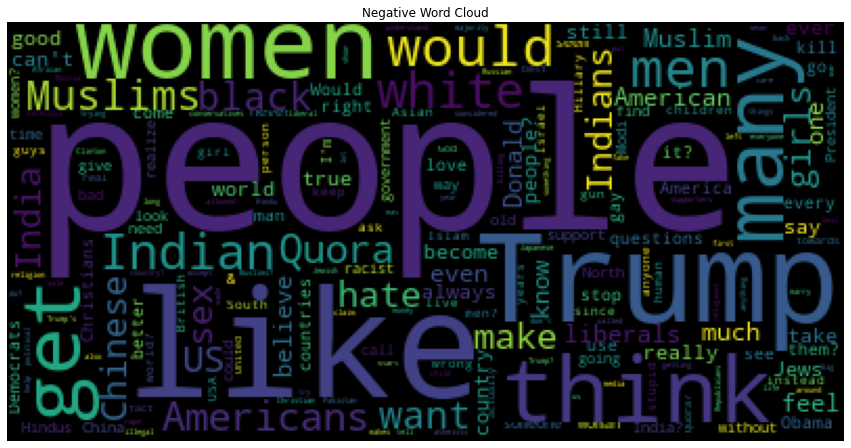

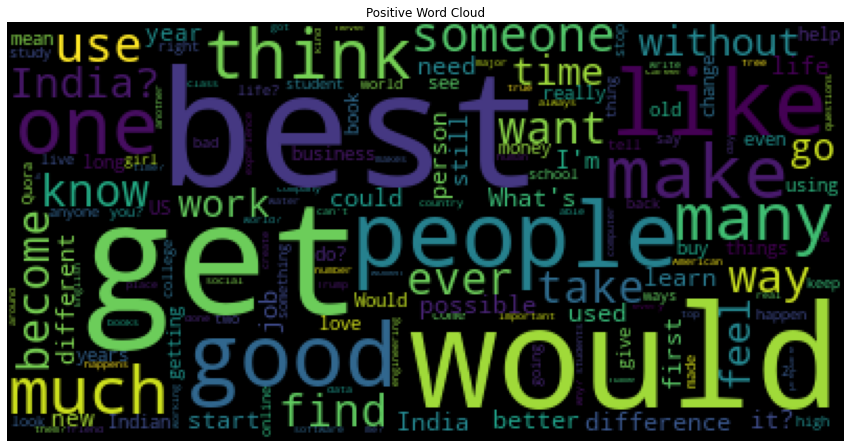

In [ ]:
plt.figure(figsize = (15, 15))
plt.imshow(neg_wcloud)
plt.axis("off")
plt.title("Negative Word Cloud")
plt.figure(figsize = (15, 15))
plt.imshow(neg_pcloud)
plt.axis("off")
plt.title("Positive Word Cloud")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


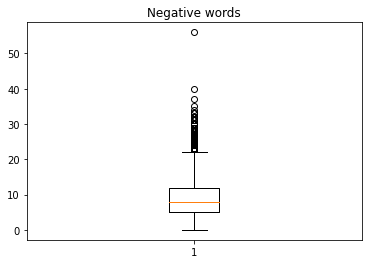

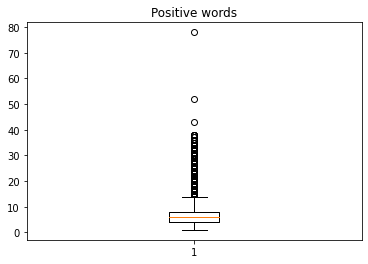

In [ ]:
import seaborn as sns
neg_word_lengths = np.array(neg_texts.str.len())
pos_word_lengths = np.array(pos_texts.str.len())
plt.boxplot(x = neg_word_lengths)
plt.title('Negative words')
plt.figure()
plt.boxplot(x = pos_word_lengths)
plt.title('Positive words')
plt.show()

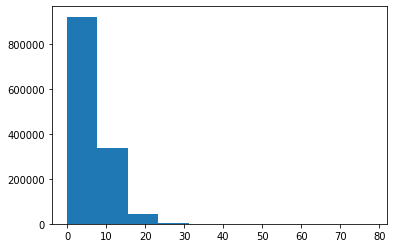

In [ ]:
all_words_length = np.concatenate([neg_word_lengths, pos_word_lengths])
plt.hist(all_words_length)
plt.show()

In [ ]:
neg_bigrams = get_ngrams_count(neg_texts, 2)
pos_bigrams = get_ngrams_count(pos_texts, 2)
neg_bigrams_counter = sorted(neg_bigrams.items(), key = lambda x: x[1], reverse = True)[:10]
pos_bigrams_counter = sorted(pos_bigrams.items(), key = lambda x: x[1], reverse = True)[:10]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: generator 'ngrams' raised StopIteration
  


In [ ]:
neg_trigrams = get_ngrams_count(neg_texts, 3)
pos_trigrams = get_ngrams_count(pos_texts, 3)
neg_trigrams_counter = sorted(neg_trigrams.items(), key = lambda x: x[1], reverse = True)[:10]
pos_trigrams_counter = sorted(pos_trigrams.items(), key = lambda x: x[1], reverse = True)[:10]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: generator 'ngrams' raised StopIteration
  


In [ ]:
x = ('Donald', 'Trump')
mystr = ' '.join(x)
print(mystr)

Donald Trump


In [ ]:
neg_bigrams_counter = [[' '.join(text), freq] for text, freq in neg_bigrams_counter]
pos_bigrams_counter = [[' '.join(text), freq] for text, freq in pos_bigrams_counter]

In [ ]:
neg_trigrams_counter = [[' '.join(text), freq] for text, freq in neg_trigrams_counter]
pos_trigrams_counter = [[' '.join(text), freq] for text, freq in pos_trigrams_counter]
p_tg_words, p_tg_counts = zip(*pos_trigrams_counter)
n_tg_words, n_tg_counts = zip(*neg_trigrams_counter)

In [ ]:
p_bg_words, p_bg_counts = zip(*pos_bigrams_counter)
n_bg_words, n_bg_counts = zip(*neg_bigrams_counter)

In [ ]:
sent = "This is a sample sentence"
ng = ngrams(sent.split(), n = 2)
for g in ng:
  print(g)

('This', 'is')
('is', 'a')
('a', 'sample')
('sample', 'sentence')


Text(0, 0.5, 'Frequencies')

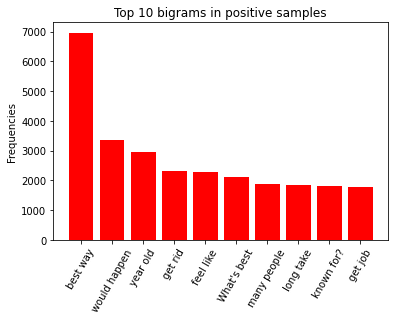

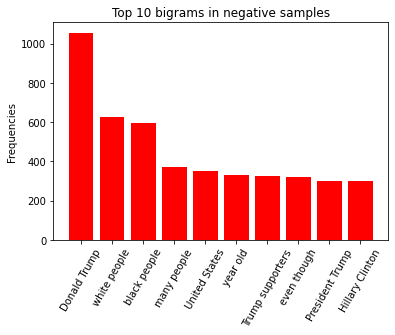

In [ ]:
import matplotlib.pyplot as plt
plt.bar(p_bg_words, p_bg_counts, color = 'red')
plt.xticks(rotation = 60)
plt.title("Top 10 bigrams in positive samples")
plt.ylabel('Frequencies')
plt.figure()
plt.bar(n_bg_words, n_bg_counts, color = 'red')
plt.xticks(rotation = 60)
plt.title("Top 10 bigrams in negative samples")
plt.ylabel('Frequencies')

Text(0, 0.5, 'Frequencies')

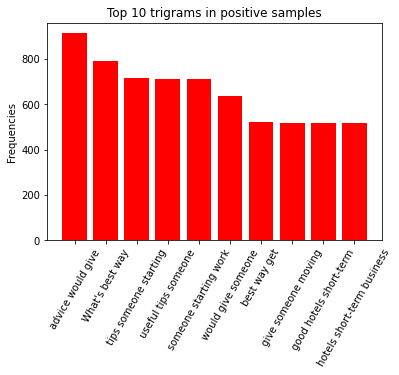

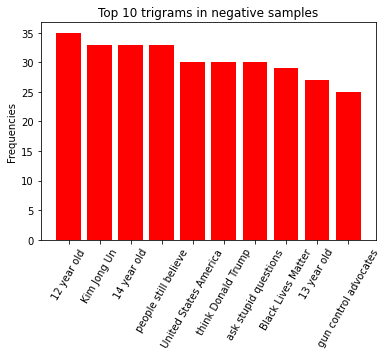

In [ ]:
import matplotlib.pyplot as plt
plt.bar(p_tg_words, p_tg_counts, color = 'red')
plt.xticks(rotation = 60)
plt.title("Top 10 trigrams in positive samples")
plt.ylabel('Frequencies')
plt.figure()
plt.bar(n_tg_words, n_tg_counts, color = 'red')
plt.xticks(rotation = 60)
plt.title("Top 10 trigrams in negative samples")
plt.ylabel('Frequencies')

In [ ]:
import string
special_chars = string.punctuation
s = "##$$$@@@!!!jhumu"
for i in s:
  if i in special_chars:
    print(i, end = " ")


# # $ $ $ @ @ @ ! ! ! 

In [ ]:
## Looking for presence  of special characters ##
def count_special_chars(corpus):
  words_with_spec = []
  count = defaultdict(int)
  for word in corpus:
    for i in word:
      if i in special_chars:
        count[i] += 1
        words_with_spec.append(word)
  return count, set(words_with_spec)


In [ ]:
res_neg = count_special_chars(neg_corpus)
res_pos = count_special_chars(pos_corpus)
neg_special_char_count, wwsn = res_neg[0], res_neg[1]
pos_special_char_count, wwsp = res_pos[0], res_pos[1]
wwsn

{'veto,',
 '"thin-cookie',
 "choice'?",
 "'sanctuary",
 'predecessors?',
 'dicks.',
 'Russions,',
 'over"?',
 'Happy,',
 '30%?',
 'cooperation,',
 'dolphin,',
 'ill-conceived',
 'prisoners,',
 'neanderthals?',
 'burden?',
 'Policy)?',
 'view"',
 'showers,',
 'abominable,',
 'war-idea',
 '€6bil)',
 '(FMPV)?',
 '"Just',
 'patient-contact',
 "'opposition",
 'ignorant.',
 'plz?',
 'pakistan?',
 'economies,',
 '(White),',
 '(March',
 'non-USA',
 'insist?',
 'contrary,',
 'propaganda:',
 'below:',
 'heretic?',
 '"corporate',
 'advancement?',
 'Obamagate,',
 'popularity,',
 'shooting"?',
 'formula,',
 'Sci-Fi',
 'grass.',
 '(bank',
 'dehatis?',
 '"Only',
 '(&',
 'flu?',
 'this)?',
 'peace.”?',
 'beefburgers.',
 '"questions"?',
 '(probably',
 '"madman',
 "converts'?",
 '"Bukura',
 'influences,',
 'etc?".',
 'Dog"',
 'Star-Spangled',
 'MSM,',
 '...',
 'theist?',
 'Baltimore,',
 'American’?',
 'delusional?',
 'century.',
 'selected?',
 '(smoking)',
 'people.?',
 'fact?',
 'Animals?',
 '2000-3000

In [ ]:
(len(wwsn)/len(neg_corpus)) * 100

6.2424550437324005

In [ ]:
import re
text = "Holla"
pattern = r"^[A-Z]\w+"
re.findall(pattern, text)

['Holla']

In [ ]:
neg_special_char_count = sorted(neg_special_char_count.items(), key = lambda x: x[1], reverse = True)
pos_special_char_count = sorted(pos_special_char_count.items(), key = lambda x: x[1], reverse = True)

Text(0.5, 1.0, 'Special Char Count in positive corpus')

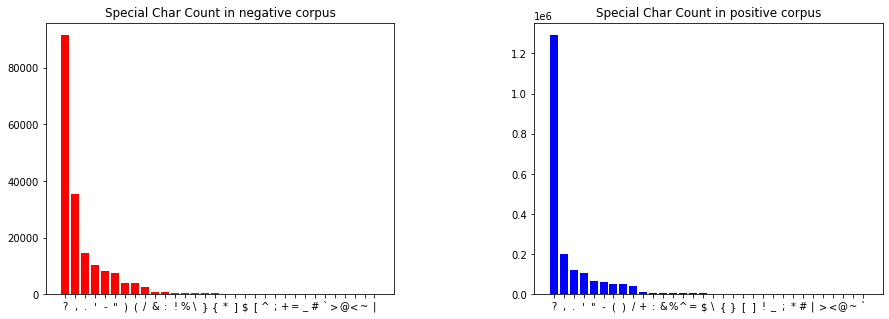

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols = 2, figsize = (15, 5))
fig.subplots_adjust(hspace = 0.4, wspace = 0.4)
x, y = zip(*neg_special_char_count)
ax1.bar(x, y, color = 'red')
ax1.set_title('Special Char Count in negative corpus')
x, y = zip(*pos_special_char_count)
ax2.bar(x, y, color = 'blue')
ax2.set_title('Special Char Count in positive corpus')

Since Quora is a question answer platform, It is obvious to expect '?' as most occuring punctuation mark, followed by ','

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
questions = np.array(df_train[df_train['target'] == 1]['question_text'])
tfidf = TfidfVectorizer(lowercase = True)
corpus_tfidf = tfidf.fit_transform(questions)

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components = 10,
                                random_state = 123,
                                learning_method = 'batch')
X_topics = lda.fit_transform(corpus_tfidf)

In [ ]:
n_top_words = 5
feature_names = tfidf.get_feature_names()
for topic_idx, topic in enumerate(lda.components_):
  print("Topic %d:" % (topic_idx + 1))
  print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))

Topic 1:
my old is to how
Topic 2:
why are do the muslims
Topic 3:
the modi is of why
Topic 4:
sex with you to is
Topic 5:
the of in to and
Topic 6:
why do women are men
Topic 7:
kim the is un jong
Topic 8:
tamil the is why are
Topic 9:
the to why is of
Topic 10:
trump the is to that


In [ ]:
neg_texts

22         [United, States, become, largest, dictatorship...
30         [babies, sweeter, parents?, Dark, skin, babies...
110        [blacks, support, school, choice, mandatory, s...
114        [gay, boy, love, cousin, (boy)., sexy,, dont, ...
115                                [races, smallest, penis?]
                                 ...                        
1306093                        [intimate, relation, cousin?]
1306094    [singers, lyrics, voices, head,, religious, pe...
1306099                         [pakis, smell, curry, shit?]
1306103    [Trump, right, all?, USA, benevolent, towards,...
1306112                                   [ashamed, Indian?]
Name: question_text, Length: 80810, dtype: object

In [ ]:
treebank_wt = nltk.TreebankWordTokenizer()
neg_wt = df_train[df_train['target'] == 1]['question_text']

In [ ]:
neg_texts_orig = neg_texts_orig.apply(lambda x: treebank_wt.tokenize(x))
pos_texts_orig = pos_texts_orig.apply(lambda x: treebank_wt.tokenize(x))

In [ ]:
neg_corpus_with_tok = create_corpus(neg_texts_orig)
pos_corpus_with_tok = create_corpus(pos_texts_orig)

100%|██████████| 1225312/1225312 [00:01<00:00, 974002.69it/s]


In [ ]:
a, b = count_special_chars(neg_corpus_with_tok)

In [ ]:
print("Percentage of tokens with special chars",np.round(len(b) * 100/ len(neg_corpus_with_tok), 2), "%")

Percentage of tokens with special chars 1.19 %


In [ ]:
def check_urls(texts):
  linked_tweets = []
  pattern1 = 'http://\S+|www\.\S+'
  pattern2 = 'https://\S+|www\.\S+'
  for sent in texts:
    for word in sent:
      if re.search(pattern1, word, re.IGNORECASE)!=None or  re.search(pattern2, word, re.IGNORECASE) != None:
        linked_tweets.append(word)
  return linked_tweets


In [ ]:
no_of_urls_neg = len(check_urls(neg_texts_orig))
no_of_urls_pos = len(check_urls(pos_texts_orig))
print("No. of urls in Negative Samples ", no_of_urls_neg)
print("No. of urls in Positive Samples ", no_of_urls_pos)

No. of urls in Negative Samples  32
No. of urls in Positive Samples  401
